In [1]:
import numpy as np
import pandas as pd

In [2]:
fake = pd.read_csv('./dataset/LabeledFake-1K.csv')
real = pd.read_csv('./dataset/LabeledAuthentic-7K.csv')
fake.head()

,articleID,domain,date,category,source,relation,headline,content,label,F-type
0,1,channeldhaka.news,2019-03-14T13:34:14+00:00,International,Reporter,Unrelated,মুরগির হামলায় শেয়াল নিহত,"বাংলায় একটা প্রবাদ আছে, শেয়ালের কাছে মুরগী বর্...",0,Satire
1,2,earki.com,"সেম্বর ১৭, ২০১৮",Miscellaneous,Reporter,Unrelated,বিটিভিতে যেবার আমি ইন্টারভিউ দিতে গেলাম,"BTV থেকে লোকজন আসছে, ইন্টারভিউ নিবে।চারজনের টি...",0,Satire
2,3,earki.com,"২০:৩৯, জানুয়ারি ১৪, ২০১৯",Miscellaneous,Reporter,Unrelated,বিদেশ থেকে উন্নতমানের বিরোধীদল আমদানি করার পরা...,অদ্ভুত বিরোধীদলহীনতায় ভুগছে সরকার। এ এক অন্যরক...,0,Satire
3,4,channeldhaka.news,2018-06-30T15:56:47+00:00,Sports,Reporter,Unrelated,অবসর নেয়ার ঘোষণা দিলেন মেসি !,রাশিয়া বিশ্বকাপ নকআউট পর্বে ফ্রান্সের সাথে ৪-৩...,0,Satire
4,5,motikontho.wordpress.com,2013-03-05T21:55:45+00:00,Miscellaneous,Reporter,Unrelated,"মাদারফাকার নহে, ব্রাদারফাকার: সাকা | দৈনিক মতি...","নিজস্ব মতিবেদক‘মাদারফাকার নহে, আমি ব্রাদারফাকা...",0,Satire


In [3]:
fake = fake[['content', 'label']]
print(fake.shape)
fake.head()

(1299, 2)


,content,label
0,"বাংলায় একটা প্রবাদ আছে, শেয়ালের কাছে মুরগী বর্...",0
1,"BTV থেকে লোকজন আসছে, ইন্টারভিউ নিবে।চারজনের টি...",0
2,অদ্ভুত বিরোধীদলহীনতায় ভুগছে সরকার। এ এক অন্যরক...,0
3,রাশিয়া বিশ্বকাপ নকআউট পর্বে ফ্রান্সের সাথে ৪-৩...,0
4,"নিজস্ব মতিবেদক‘মাদারফাকার নহে, আমি ব্রাদারফাকা...",0


In [4]:
real = real[['content', 'label']]
real['label'] = 1
print(real.shape)
real.head()

(7202, 2)


,content,label
0,ক্রিকেট বিশ্বের নতুন চমকের নাম আফগানিস্তান। কয়...,1
1,এশিয়া কাপের ষষ্ঠ ম্যাচে বাংলাদেশ দলের বিপক্ষে ...,1
2,রাজধানীতে মাদক বিরোধী বিশেষ অভিযান পরিচালনা কর...,1
3,সনাতন ধর্মাবলম্বীদের সবচেয়ে বড় ধর্মীয় উৎসব দুর...,1
4,ভারত থেকে পাইপ লাইনের মাধ্যমে সরাসরি দেশে জ্বা...,1


In [5]:
fake = fake.sample(1000)
real = real.sample(1000)
print(fake.shape)
print(real.shape)

data = pd.concat([fake, real], ignore_index=True)
print(data.shape)
data.head()

(1000, 2)
(1000, 2)
(2000, 2)


,content,label
0,লাইলাতুল কদর শান্তিময় এক রজনী। আল্লাহ পাক এ রজ...,0
1,ব্রিটিশ আমলের আইন বাতিল করে সুপ্রিম কোর্টের দে...,0
2,জনপ্রিয় রম্য পত্রিকা ‘উন্মাদ’ এর সম্পাদক আহসান...,0
3,ইন্টারনেট ব্যবহারে কড়াকড়ি আরোপ করে নতুন আইন ...,0
4,এক নব দম্পতির বিয়ের রাতে জামাই বৌকে বলছে-‘আমি...,0


In [6]:
from sklearn.utils import shuffle
data = shuffle(data)
data.reset_index(inplace=True, drop=True)
data.head()

,content,label
0,চট্টগ্রাম: প্রিমিয়ার বিশ্ববিদ্যালয়ের দামপাড়া ভ...,1
1,কক্সবাজারের রামুতে বৌদ্ধ বিহার ও বসতিতে হামলার...,1
2,গার্লফ্রেন্ড দেয়া হবে জিপিএ ৫ পেলে ! এ যেনো মা...,0
3,নানা কারণে বিখ্যাত বন্দর নগরী চট্টগ্রাম। পাশ্চ...,0
4,বাম গণতান্ত্রিক জোটের নির্বাচন কমিশন (ইসি) কার...,1


# Data Cleaning

In [8]:
from bnlp import BasicTokenizer
from bnlp.corpus import stopwords, punctuations, letters, digits
btokenizer = BasicTokenizer()

def is_english(word):
    if ((word[0]>= 'a' and word[0] <= 'z') or (word[0]>= 'A' and word[0] <= 'Z')):
        return True
    else:
        return False

def clean_text(text):
    tokens = btokenizer.tokenize(text)
    filtered = []
    for i in tokens:
        if (i in stopwords) or (i in punctuations + '‘' + '’') or (i in digits) or (is_english(i)):
            continue
        filtered.append(i)
    return " ".join(filtered)

C:\Users\riaad\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [9]:
data['content'] = data.content.apply(clean_text)
data.head()

,content,label
0,চট্টগ্রাম প্রিমিয়ার বিশ্ববিদ্যালয়ের দামপাড়া ভব...,1
1,কক্সবাজারের রামুতে বৌদ্ধ বিহার বসতিতে হামলার স...,1
2,গার্লফ্রেন্ড দেয়া জিপিএ পেলে যেনো মায়ের হাতের ...,0
3,কারণে বিখ্যাত বন্দর নগরী চট্টগ্রাম পাশ্চাত্যের...,0
4,বাম গণতান্ত্রিক জোটের নির্বাচন কমিশন ইসি কার্য...,1


# Data summary

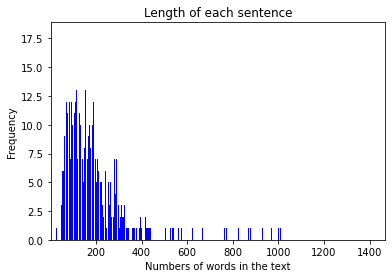

Maximum Length of a review(words): 1769
Average Length of a reviews(words): 196.0


In [15]:
import matplotlib.pyplot as plt
# Calculate the length of each of the Review
data['length'] = data.content.apply(lambda x:len(x.split()))
frequency = dict()
for i in data.length:
    frequency[i] = frequency.get(i, 0)+1
    
plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 1469)
# in this notbook color is not working but it should work.
plt.xlabel('Numbers of words in the text')
plt.ylabel('Frequency')
plt.title('Length of each sentence')
plt.savefig('Figures/sentence_length.png',dpi = 600,bbox_inches = 'tight')
plt.show()  
print(f"Maximum Length of a review(words): {max(data.length)}")
print(f"Average Length of a reviews(words): {round(np.mean(data.length),0)}")

In [16]:
data.to_excel("dataset/preprocessed.xlsx")